In [1]:
import geopandas as gpd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

import warnings
warnings.simplefilter("ignore")

gpd.__version__

'0.11.1'

In [2]:
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

countries.tail(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
174,1794248.0,Europe,Kosovo,KOS,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."
176,11062113.0,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ..."


In [3]:
cities.tail()

,name,geometry
197,Cairo,POINT (31.24802 30.05191)
198,Tokyo,POINT (139.74946 35.68696)
199,Paris,POINT (2.33139 48.86864)
200,Santiago,POINT (-70.66899 -33.44807)
201,Singapore,POINT (103.85387 1.29498)


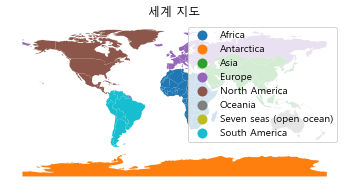

In [4]:
ax = countries.plot(column="continent", legend=True, categorical=True)
ax.set_title("세계 지도")
ax.set_axis_off()
plt.show()

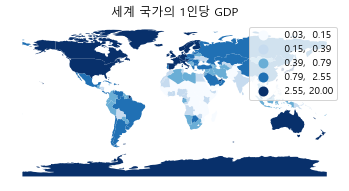

In [5]:
countries['gdp_per_cap'] = countries['gdp_md_est'] / countries['pop_est'] * 100

ax = countries.plot(column='gdp_per_cap', legend=True, scheme='quantiles', cmap="Blues", k=5)
ax.set_axis_off()
ax.set_title("세계 국가의 1인당 GDP")
plt.show()

In [6]:
countries.geom_type[:3]

0    MultiPolygon
1         Polygon
2         Polygon
dtype: object

In [7]:
print(countries.geometry[113])

POLYGON ((23.48412763844985 53.91249766704114, 23.527535841575002 53.470121568406555, 23.80493493011778 53.089731350306074, 23.79919884613338 52.69109935160657, 23.199493849386187 52.48697744405367, 23.508002150168693 52.02364655212473, 23.52707075368437 51.57845408793031, 24.029985792748903 50.70540660257518, 23.92275719574326 50.42488108987874, 23.426508416444392 50.30850576435745, 22.518450148211603 49.47677358661974, 22.776418898212626 49.02739533140962, 22.558137648211755 49.085738023467144, 21.607808058364213 49.47010732685409, 20.887955356538413 49.32877228453583, 20.415839471119853 49.43145335549977, 19.825022820726872 49.21712535256923, 19.320712517990472 49.571574001659194, 18.90957482267632 49.435845852244576, 18.853144158613617 49.49622976337764, 18.392913852622172 49.98862864847075, 17.64944502123899 50.049038397819956, 17.55456709155112 50.36214590107642, 16.86876915860566 50.47397370055603, 16.719475945714436 50.21574656839354, 16.176253289462267 50.42260732685791, 16.23

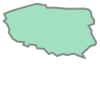

In [8]:
countries.geometry[113]

In [9]:
cities.geom_type[:3]

0    Point
1    Point
2    Point
dtype: object

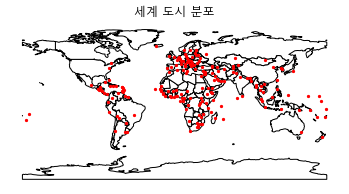

In [10]:
base = countries.plot(color='white', edgecolor="k")
ax = cities.plot(ax=base, marker='o', color='red', markersize=5)
ax.set_axis_off()
ax.set_title("세계 도시 분포")
plt.show()

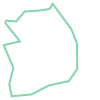

In [11]:
korea_border = countries[countries.name == "South Korea"].geometry
korea_border.boundary.squeeze()

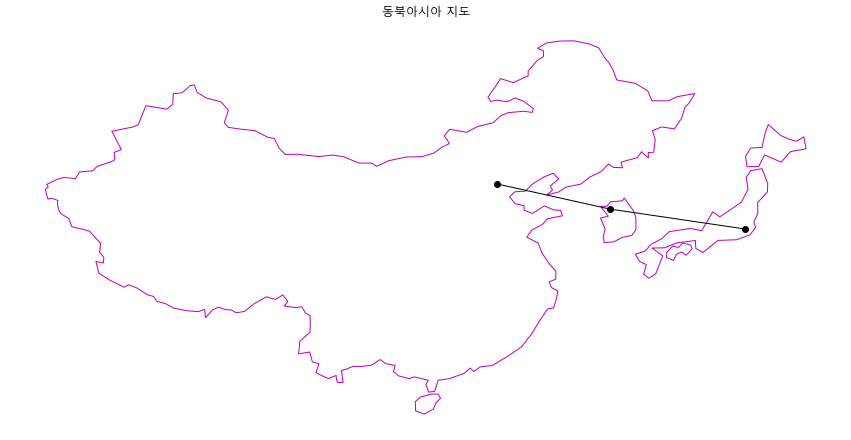

In [12]:
from shapely.geometry import Point, Polygon, LineString

northern_asia = countries.loc[countries['name'].isin(['South Korea', 'China', 'Japan'])]
base = northern_asia.plot(figsize=(15, 15), color="w", edgecolor="m")

seoul = cities.loc[cities.name == "Seoul", "geometry"].squeeze()
beijing = cities.loc[cities.name == "Beijing", "geometry"].squeeze()
tokyo = cities.loc[cities.name == "Tokyo", "geometry"].squeeze()

line = LineString([beijing, seoul, tokyo])

ax = gpd.GeoSeries([seoul, beijing, tokyo, line]).plot(ax=base, color="k", edgecolor='k', lw=1)
ax.set_title("동북아시아 지도")
ax.set_axis_off()
plt.show()

In [13]:
korea = countries.loc[countries['name'] == 'South Korea', 'geometry'].squeeze()
china = countries.loc[countries['name'] == 'China', 'geometry'].squeeze()
japan = countries.loc[countries['name'] == 'Japan', 'geometry'].squeeze()

In [14]:
seoul.within(korea)

True

In [15]:
korea.contains(seoul)

True

In [16]:
china.intersects(korea)

False

In [17]:
line.crosses(korea)

True

In [18]:
countries[countries.crosses(line)]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
95,2.566616e+07,Asia,North Korea,PRK,40000,"MULTIPOLYGON (((130.78000 42.22001, 130.78000 ...",0.155847
96,5.170910e+07,Asia,South Korea,KOR,1646739,"POLYGON ((126.17476 37.74969, 126.23734 37.840...",3.184621
139,1.397715e+09,Asia,China,CHN,14342903,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",1.026168
155,1.262649e+08,Asia,Japan,JPN,5081769,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ...",4.024688


In [19]:
seoul.distance(beijing)

10.871264032732043

In [20]:
countries[countries.geometry.distance(seoul) <= seoul.distance(beijing)]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
18,1.443735e+08,Europe,Russia,RUS,1699876,"MULTIPOLYGON (((178.72530 71.09880, 180.00000 ...",1.177415
95,2.566616e+07,Asia,North Korea,PRK,40000,"MULTIPOLYGON (((130.78000 42.22001, 130.78000 ...",0.155847
96,5.170910e+07,Asia,South Korea,KOR,1646739,"POLYGON ((126.17476 37.74969, 126.23734 37.840...",3.184621
139,1.397715e+09,Asia,China,CHN,14342903,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",1.026168
155,1.262649e+08,Asia,Japan,JPN,5081769,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ...",4.024688


In [21]:
china.area / korea.area

95.89679828612043

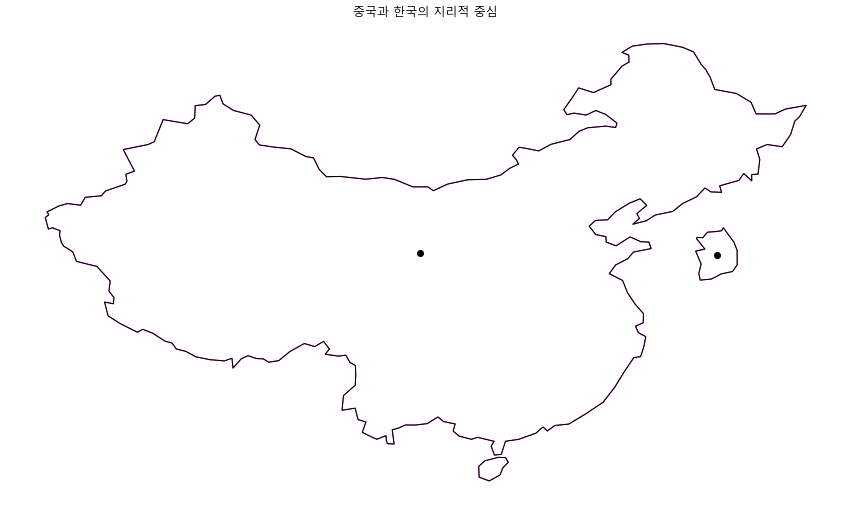

In [22]:
base = northern_asia[northern_asia.name != "Japan"].plot(
    figsize=(15, 15), color="w", edgecolor="m")
ax = gpd.GeoSeries([china.boundary, korea.boundary, china.centroid,
                    korea.centroid]).plot(ax=base, color="k", edgecolor='k', lw=1)
ax.set_title("중국과 한국의 지리적 중심")
ax.set_axis_off()
plt.show()

In [23]:
seoul_file = "./administrative_district-master/administrative_district-master/5_서울시_집계구/shp/BND_TOTAL_OA_PG_11.shp"
seoul = gpd.read_file(seoul_file, encoding='euckr')
seoul.tail(3)

,OBJECTID,ADM_DR_CD,TOT_OA_CD,SHAPE_LENG,SHAPE_AREA,geometry
19442,100982,1104073,1104073040502,495.781102,6124.213580,"POLYGON ((957521.041 1949363.662, 957518.512 1..."
19443,100983,1104068,1104068010303,465.762264,8120.197910,"POLYGON ((960832.163 1949795.430, 960875.660 1..."
19444,100984,1104071,1104071020106,641.000167,18239.972288,"POLYGON ((958070.838 1952233.809, 958071.923 1..."


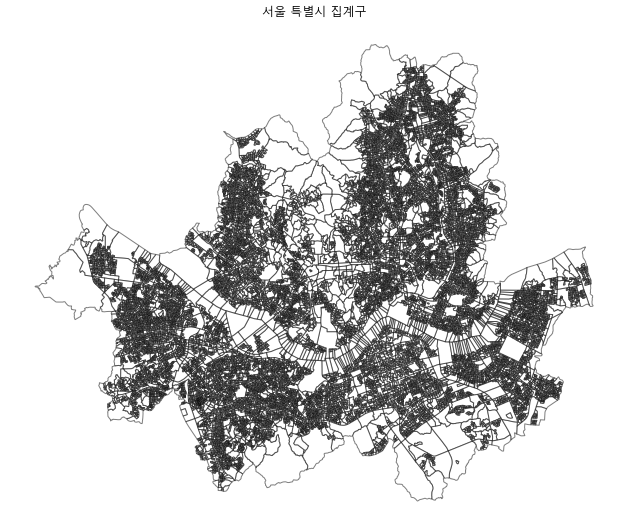

In [24]:
ax = seoul.plot(figsize=(11, 11), color="w", edgecolor="k", alpha = 0.5)
ax.set_title("서울 특별시 집계구")
ax.set_axis_off()
plt.show()